---
sidebar_position: 1
---

> You can get this [Notebook](https://github.com/Seeed-Projects/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/blob/main/articles/Chapter%205%20-%20Custom%20Model%20Development%20and%20Deployment/Training%20Your%20Model.ipynb) on GitHub.

# Step 1: Prepare you environment on your host computer

**Note：This part of code run on your host computer**

The Jupyter Notebook right up have a button like ![select kernel](../../pictures/Chapter5/select_kernel.png), then you choose ```Select Another Kernel```, and choose ```Python Environments```, then choose ```Creat Python Environment``` and choose ```Venv```, then choose ```python3.10```.

In [1]:
# Here is my hostcomputer information, you should install Ubantu 22.04 if you what use this code.
# Linux PC 6.8.0-45-generic #45~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Sep 11 15:25:05 UTC 2 x86_64 x86_64 x86_64 GNU/Linux.

!uname -a

Linux PC 6.8.0-45-generic #45~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Sep 11 15:25:05 UTC 2 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
# Here is my python version, you should install python3.10.12 
# Python 3.10.12

!python -V

Python 3.10.12


In [2]:
# Install libs, if you see 'install successfully' it means you install libs successfully, or when you see 'install error' it means you install libs unsuccessfully
try:
    %pip install torch torchvision pycocotools opencv-python ultralytics matplotlib -q
    print('install successfully')
except:
    print('install error')


Note: you may need to restart the kernel to use updated packages.
install successfully


# Step 2: Prepare your dateset

I want to build a model to detect different fruit include banana, apple and orange. So I need to collect some pictures of this fruit. And I use [robflow](https://roboflow.com/) to label my dataset.

## Step 1: Create Project

Select ```New Project```:

![roboflow_1](../../pictures/Chapter5/roboflow_1.png)

Fill your project information and create the project

![roboflow_2](../../pictures/Chapter5/roboflow_2.png)

## Step 2: Update images and annotate

Update images

![roboflow_3](../../pictures/Chapter5/roboflow_3.png)

Label your image

![roboflow_4](../../pictures/Chapter5/roboflow_4.png)

## Step 3: Export dataset

Add annotated image to your dataset

![roboflow_5](../../pictures/Chapter5/roboflow_5.png)

Generate New version of your dataset

![roboflow_6](../../pictures/Chapter5/roboflow_6.png)

Download your dataset

![roboflow_7](../../pictures/Chapter5/roboflow_7.png)


In [3]:
# Download gdown to install dataset from google driver, if you see 'install successfully' it means you install libs successfully, or when you see 'install error' it means you install libs unsuccessfully
try:
    %pip install gdown -q
    print('install successfully')
except:
    print('install error')

Note: you may need to restart the kernel to use updated packages.
install successfully


In [5]:
# Download your dataset, and you can also train your model on roboflow   
!gdown https://drive.google.com/uc?id=1zZKnIVAcdNLUKg7IxaF-xLzE3Fvr3A05  && unzip roboflow.zip -d ~/datasets/ && rm roboflow.zip && mv ~/datasets/data.yaml ./data.yaml && cp -r ~/datasets/test/images ./

Downloading...
From: https://drive.google.com/uc?id=1zZKnIVAcdNLUKg7IxaF-xLzE3Fvr3A05
To: /home/jiahao/example/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/Chapter5_Custom_Model_Development_and_Deployment/roboflow.zip
100%|██████████████████████████████████████| 6.71M/6.71M [00:02<00:00, 3.01MB/s]
Archive:  roboflow.zip
  inflating: /home/jiahao/datasets/README.dataset.txt  
  inflating: /home/jiahao/datasets/README.roboflow.txt  
  inflating: /home/jiahao/datasets/data.yaml  
   creating: /home/jiahao/datasets/test/
   creating: /home/jiahao/datasets/test/images/
 extracting: /home/jiahao/datasets/test/images/20240918104508517_jpg.rf.fc23cc5073658776229f2ce2facaccf2.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918104609422_jpg.rf.1b1eec4e7487857e73728fb66b5c19e5.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918111003194_jpg.rf.0d8caffdb9f7ed581ae4790861117445.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918111025904_jpg.rf.ecc1f6af3eb9ec

# Step 3: Training Yolo11n

YOLOv11 is the latest version in the YOLO (You Only Look Once) series developed by Ultralytics, following previous iterations like YOLOv5 and YOLOv8. It retains the key features of earlier versions, focusing on real-time object detection with improvements in speed, accuracy, and versatility across various tasks, such as object detection, segmentation, classification, and pose estimation.

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt") # load a pretrained model (recommended for training)
# Train model with 10 epochs
results = model.train(data="data.yaml", epochs=20, imgsz=640, batch=16)


100%|██████████| 5.35M/5.35M [00:01<00:00, 3.14MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.5.0+cu124 CPU (AMD Ryzen 5 5600G with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /home/jiahao/datasets/train/labels... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 2450.39it/s]

train: New cache created: /home/jiahao/datasets/train/labels.cache



val: Scanning /home/jiahao/datasets/valid/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 2914.46it/s]

val: New cache created: /home/jiahao/datasets/valid/labels.cache


Plotting labels to /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.6629      3.092      1.013         54        640: 100%|██████████| 5/5 [01:29<00:00, 17.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]

                   all         22         59    0.00912          1      0.535      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.6204      2.778     0.9716         47        640: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all         22         59     0.0091          1      0.744      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.6386      2.313     0.9908         65        640: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         22         59    0.00896          1      0.816      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.5686       1.82      0.928         54        640: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all         22         59    0.00894          1      0.911      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.5658      1.527     0.9462         48        640: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all         22         59    0.00897          1      0.905      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.5941      1.296     0.9382         47        640: 100%|██████████| 5/5 [00:22<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all         22         59    0.00902          1      0.887      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.5397      1.103     0.9318         63        640: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         22         59    0.00904          1      0.917      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.5954      1.007     0.9539         76        640: 100%|██████████| 5/5 [00:16<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         22         59          1      0.323      0.948      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.5897      1.038     0.9921         42        640: 100%|██████████| 5/5 [00:16<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all         22         59          1      0.324      0.991      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.5724     0.9229     0.9413         57        640: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         22         59          1      0.544      0.995       0.89


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.5226     0.9882     0.9502         33        640: 100%|██████████| 5/5 [00:16<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         22         59          1      0.754      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.5156     0.9516     0.9467         32        640: 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all         22         59          1      0.712      0.992      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.4717     0.9665     0.8938         32        640: 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         22         59          1      0.717      0.988      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.4689     0.9379     0.8827         31        640: 100%|██████████| 5/5 [00:16<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all         22         59      0.967       0.77      0.981      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      0.465     0.8894     0.9227         34        640: 100%|██████████| 5/5 [00:16<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all         22         59      0.986      0.942      0.994      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.4335     0.8448     0.8771         33        640: 100%|██████████| 5/5 [00:16<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         22         59      0.989      0.952      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.4267     0.8703     0.8883         31        640: 100%|██████████| 5/5 [00:16<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         22         59      0.987      0.996      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.4615     0.8565     0.9161         30        640: 100%|██████████| 5/5 [00:16<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all         22         59      0.981          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.4054     0.8082     0.8759         36        640: 100%|██████████| 5/5 [00:16<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         22         59      0.979          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      0.414      0.821     0.8681         29        640: 100%|██████████| 5/5 [00:16<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all         22         59      0.977          1      0.995      0.926



20 epochs completed in 0.128 hours.
Optimizer stripped from /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.pt, 5.5MB

Validating /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.5.0+cu124 CPU (AMD Ryzen 5 5600G with Radeon Graphics)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


                   all         22         59      0.977          1      0.995      0.926
                 apple         21         21      0.978          1      0.995      0.929
                banana         19         19      0.989          1      0.995      0.872
                orange         19         19      0.965          1      0.995      0.978
Speed: 1.6ms preprocess, 60.7ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train



0: 640x640 1 apple, 1 banana, 1 orange, 56.5ms
Speed: 1.3ms preprocess, 56.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


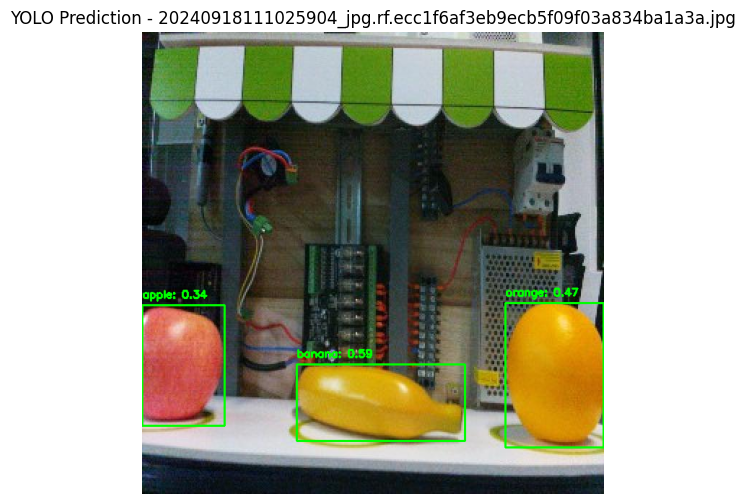


0: 640x640 1 apple, 1 banana, 1 orange, 46.4ms
Speed: 1.2ms preprocess, 46.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


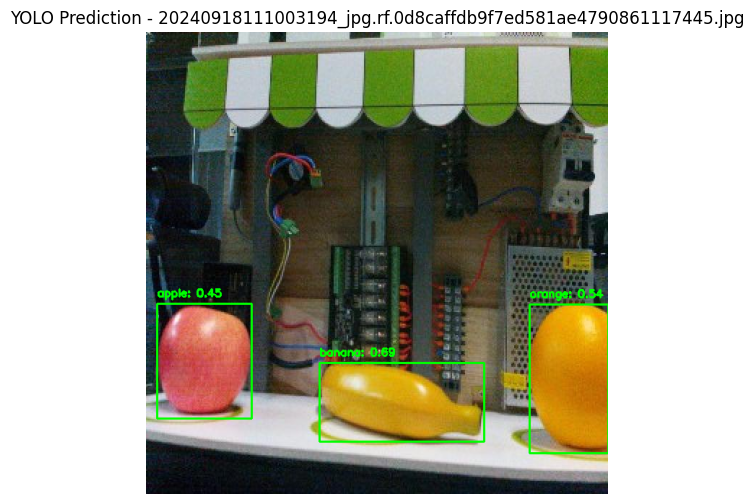


0: 640x640 1 banana, 1 orange, 46.1ms
Speed: 1.1ms preprocess, 46.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


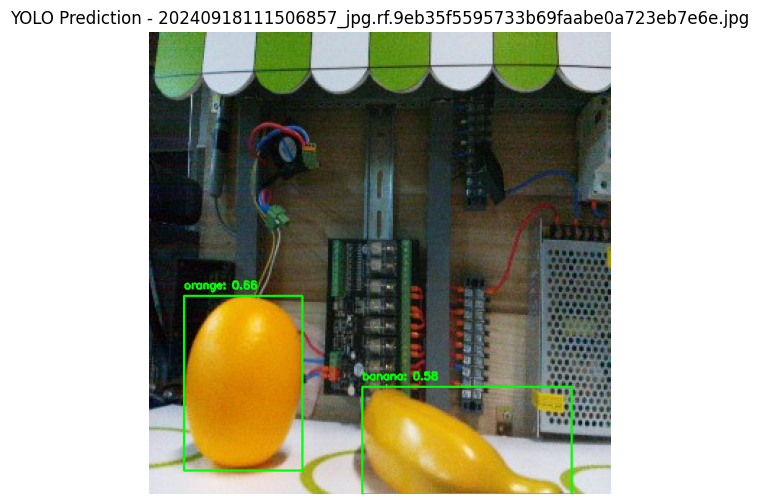


0: 640x640 1 apple, 1 orange, 83.6ms
Speed: 1.2ms preprocess, 83.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


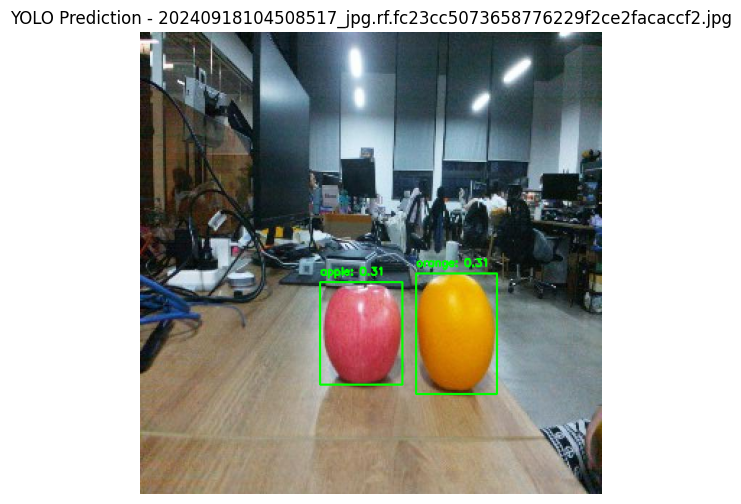


0: 640x640 1 apple, 1 banana, 1 orange, 49.5ms
Speed: 1.3ms preprocess, 49.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


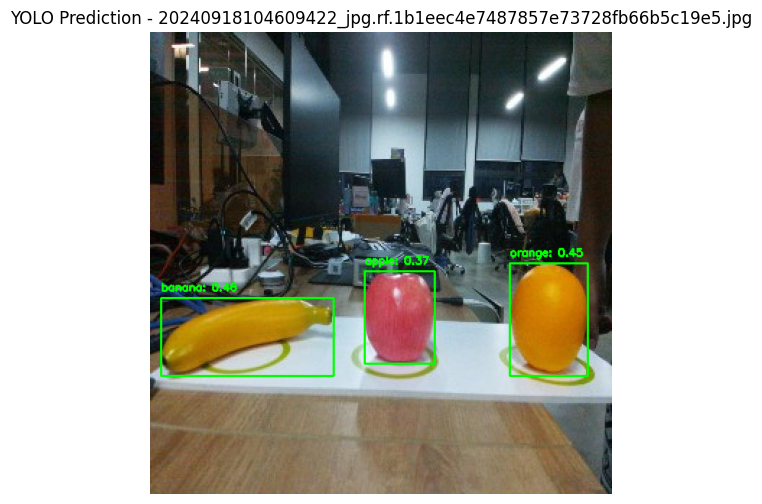


0: 640x640 1 apple, 46.4ms
Speed: 1.0ms preprocess, 46.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


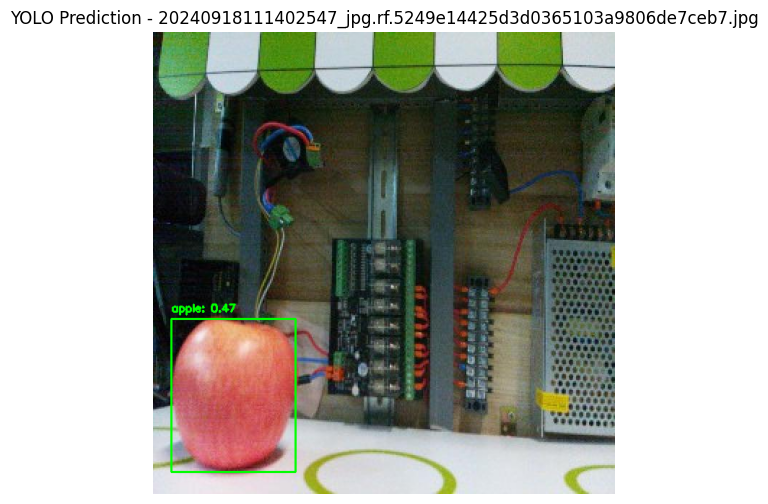


0: 640x640 1 apple, 1 banana, 1 orange, 55.7ms
Speed: 1.3ms preprocess, 55.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


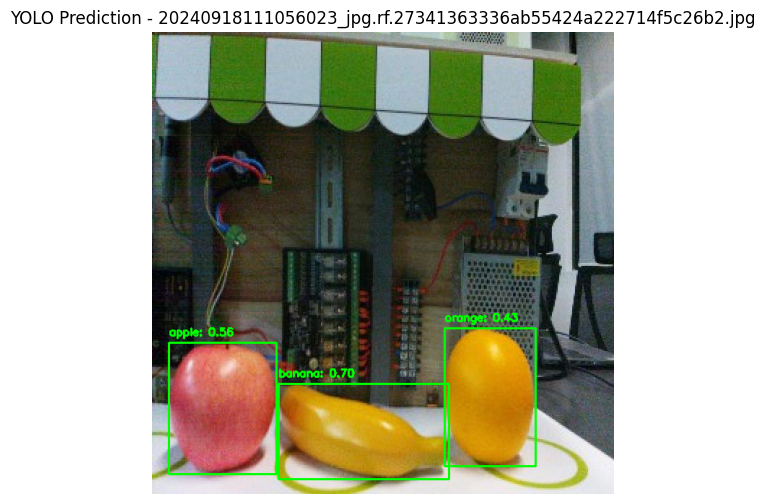


0: 640x640 1 apple, 1 orange, 87.3ms
Speed: 1.3ms preprocess, 87.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


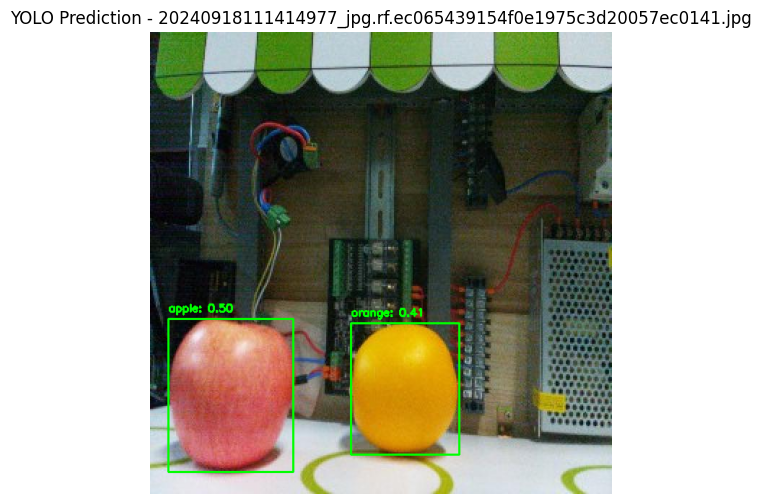


0: 640x640 1 apple, 1 banana, 48.6ms
Speed: 1.2ms preprocess, 48.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


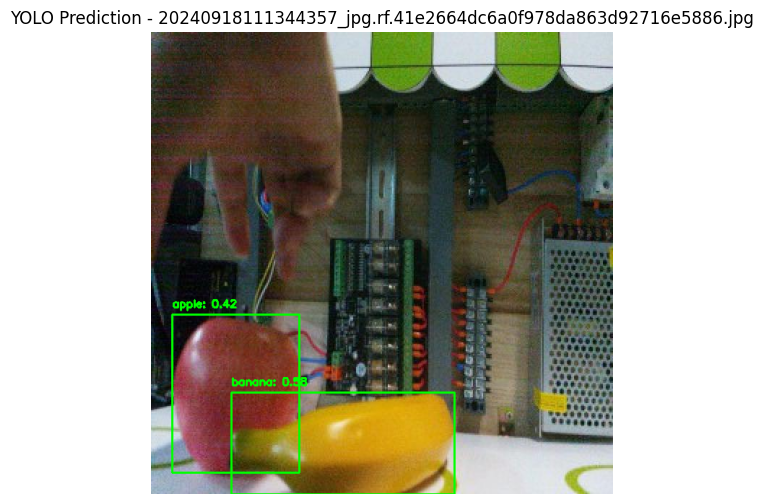


0: 640x640 1 apple, 1 banana, 1 orange, 48.8ms
Speed: 1.1ms preprocess, 48.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


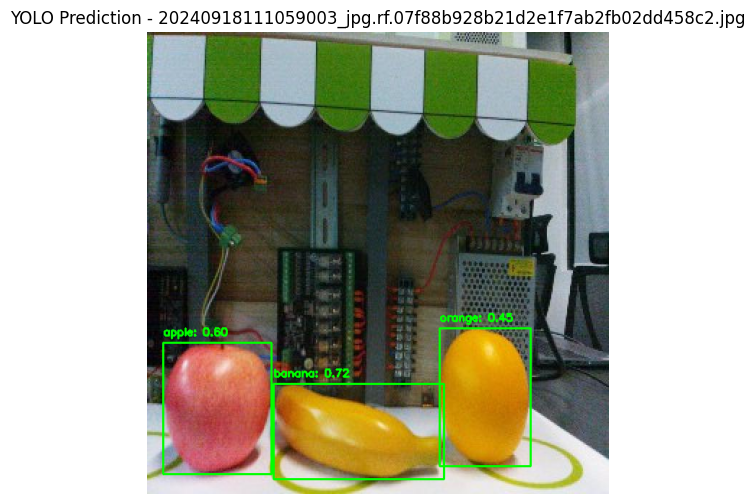


0: 640x640 1 apple, 1 banana, 1 orange, 46.6ms
Speed: 1.2ms preprocess, 46.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


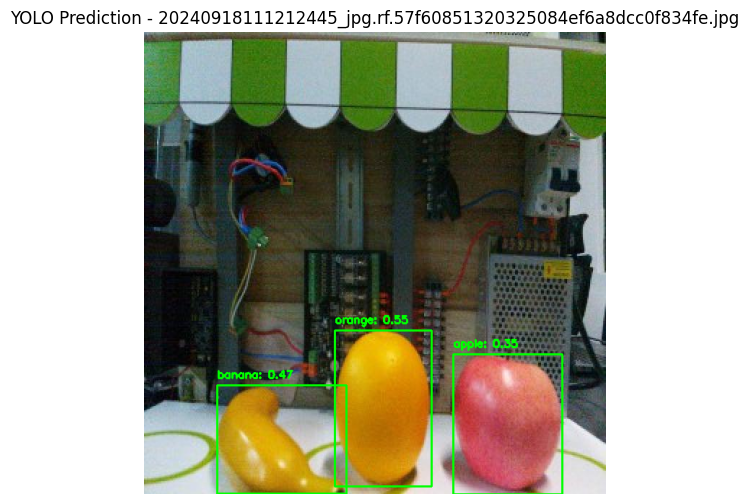

In [7]:
%matplotlib inline

import cv2
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the image directory path
image_dir = './images/'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Loop through each image in the directory
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    # Perform prediction
    results = model(image)

    # Process the results and draw bounding boxes
    for result in results:
        # Extract bounding boxes
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
                conf = box.conf[0]  # Confidence score
                cls = int(box.cls[0])  # Class label index
                label = f"{model.names[cls]}: {conf:.2f}"  # Create label text

                # Draw the bounding box and label on the image
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green label

    # Convert BGR image (from OpenCV) to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.title(f"YOLO Prediction - {image_file}")
    plt.show()


# Step 4: Export to ONNX format

I will use Hailo DataFlow Compiler to convert model to hef format to inference on AI Kit, so I need to convert model to onnx format.

In [8]:
# Export Yolov11n model to onnx format, the path will be shown as below
# For me the path is /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.onnx

model.export(format="onnx", opset=10)

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.5.0+cu124 CPU (AMD Ryzen 5 5600G with Radeon Graphics)

PyTorch: starting from '/home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 9.5 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 17.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 10...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success ✅ 18.8s, saved as '/home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/t

'/home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.onnx'